In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import tensorflow as tf
%matplotlib inline
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
df=pd.read_csv('45 channel 1sec gammapower with labels.csv')


print('Number of rows and columns:', df.shape)
df.head(5)


Number of rows and columns: (8391, 46)


,0.49674,0.27869,0.36769,0.15285,0.1606,0.1328,0.17606,0.3842,0.19877,0.17507,...,0.026382,0.47723,0.49575,0.020878,0.56216,0.072675,0.012301,0.20969,0.96803,1
0,0.33987,0.30726,0.41558,0.08913,0.050547,0.06491,0.39323,0.38360,0.10949,0.051013,...,0.024939,0.44242,1.10520,0.059324,0.59389,0.104870,0.015580,0.28607,0.8052,1
1,1.05390,0.62420,0.76443,0.16515,0.130160,0.12405,0.20658,0.31734,0.13543,0.107550,...,0.031025,0.37524,0.96673,0.016728,0.68470,0.110690,0.024799,0.39180,1.6939,1
2,0.52938,0.55425,1.15230,0.19599,0.250720,0.19250,0.54821,0.61870,0.12645,0.168630,...,0.024906,0.36123,0.80062,0.023526,0.33890,0.129660,0.024569,0.12719,1.2756,1
3,0.41048,0.57873,1.08700,0.19010,0.197860,0.11049,0.34741,0.58997,0.19465,0.156660,...,0.033802,0.17266,0.58332,0.029163,0.25033,0.070588,0.019401,0.17296,1.3850,1
4,0.77517,0.80068,0.60916,0.16913,0.160560,0.25734,0.35381,0.47752,0.17826,0.188030,...,0.015676,0.62293,0.80999,0.035136,0.67094,0.128600,0.036664,0.35137,1.4768,1




**Labelling COLUMNS**

In [2]:
print(df.columns)

Index(['0.49674', '0.27869', '0.36769', '0.15285', '0.1606', '0.1328',
       '0.17606', '0.3842', '0.19877', '0.17507', '0.10564', '0.3156',
       '0.14643', '0.10827', '1.2166', '0.073472', '0.037876', '0.26714',
       '0.49989', '0.094403', '0.037798', '0.0073178', '0.6007', '2.7036',
       '0.18483', '0.14811', '0.17573', '1.3432', '0.17928', '0.10368',
       '0.15127', '0.16376', '0.13955', '0.16332', '0.21231', '0.85415',
       '0.026382', '0.47723', '0.49575', '0.020878', '0.56216', '0.072675',
       '0.012301', '0.20969', '0.96803', '1'],
      dtype='object')


In [3]:
new_names = {'0.49674':'a', '0.27869':'b', '0.36769':'c', '0.15285':'cd', '0.1606':'d','0.1328':'de','0.17606':'e','0.3842':'f','0.19877':'g',
       '0.17507':'l', '0.10564':'m', '0.3156':'n', '0.14643':'o', '0.10827':'p','1.2166':'q', '0.073472':'r',
       '0.037876':'s', '0.26714':'t', '0.49989':'u', '0.094403':'v', '0.037798':'w', '0.0073178':'x', '0.6007':'y',
       '2.22':'z', '0.13759':'aa', '0.22783':'bb', '2.3247':'cc', '3.8245':'dd', '0.16294':'ee',
       '2.7036':'ff', '0.18483':'gg', '0.16376':'hh', '0.13955':'ii', '0.16332':'jj', '0.21231':'kk',
       '0.85415':'ll', '0.026382':'mm', '0.47723':'nn', '0.49575':'oo', '0.020878':'pp', '0.56216':'qq',
       '0.072675':'rr','0.012301':'j','0.14811':'ss','0.17573':'tt','1.3432':'uu','0.17928':'vv','0.10368':'ww','0.15127':'xx',
       '0.20969':'k','0.96803':'h','1':'labels'}
df= df.rename(index=str, columns=new_names)

***Checking any null Values***

In [4]:

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8391 entries, 0 to 8390
Data columns (total 46 columns):
a         8391 non-null float64
b         8391 non-null float64
c         8391 non-null float64
cd        8391 non-null float64
d         8391 non-null float64
de        8391 non-null float64
e         8391 non-null float64
f         8391 non-null float64
g         8391 non-null float64
l         8391 non-null float64
m         8391 non-null float64
n         8391 non-null float64
o         8391 non-null float64
p         8391 non-null float64
q         8391 non-null float64
r         8391 non-null float64
s         8391 non-null float64
t         8391 non-null float64
u         8391 non-null float64
v         8391 non-null float64
w         8391 non-null float64
x         8391 non-null float64
y         8391 non-null float64
ff        8391 non-null float64
gg        8391 non-null float64
ss        8391 non-null float64
tt        8391 non-null float64
uu        8391 non-null float64
vv

In [5]:
pd.set_option('display.max_columns', None)
print(df.describe())



                 a            b            c           cd            d  \
count  8391.000000  8391.000000  8391.000000  8391.000000  8391.000000   
mean      1.793848     1.408637     1.668601     5.297504     1.338683   
std       3.779297     2.993216     4.697215    22.797560     3.771786   
min       0.069340     0.071170     0.041441     0.029195     0.029953   
25%       0.557810     0.395340     0.539525     0.745215     0.357695   
50%       0.944410     0.684720     0.897880     1.550700     0.621820   
75%       1.756700     1.468150     1.730500     3.101900     1.195550   
max      98.518000   120.590000   284.630000   725.290000   171.880000   

                de            e            f            g            l  \
count  8391.000000  8391.000000  8391.000000  8391.000000  8391.000000   
mean      0.862561     1.644785     5.783262     4.993241     0.865916   
std       1.368859     8.802944    48.612101    21.531581     1.933451   
min       0.033560     0.040783     0

***spliting the file in the data and target class***

In [6]:
data = df.iloc[:,:-1].values.tolist()
target = df.iloc[:,-1].tolist()

In [7]:

print(data)
print(target)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**heatmap**

Text(0.5, 1.0, 'Correlation of Variables')

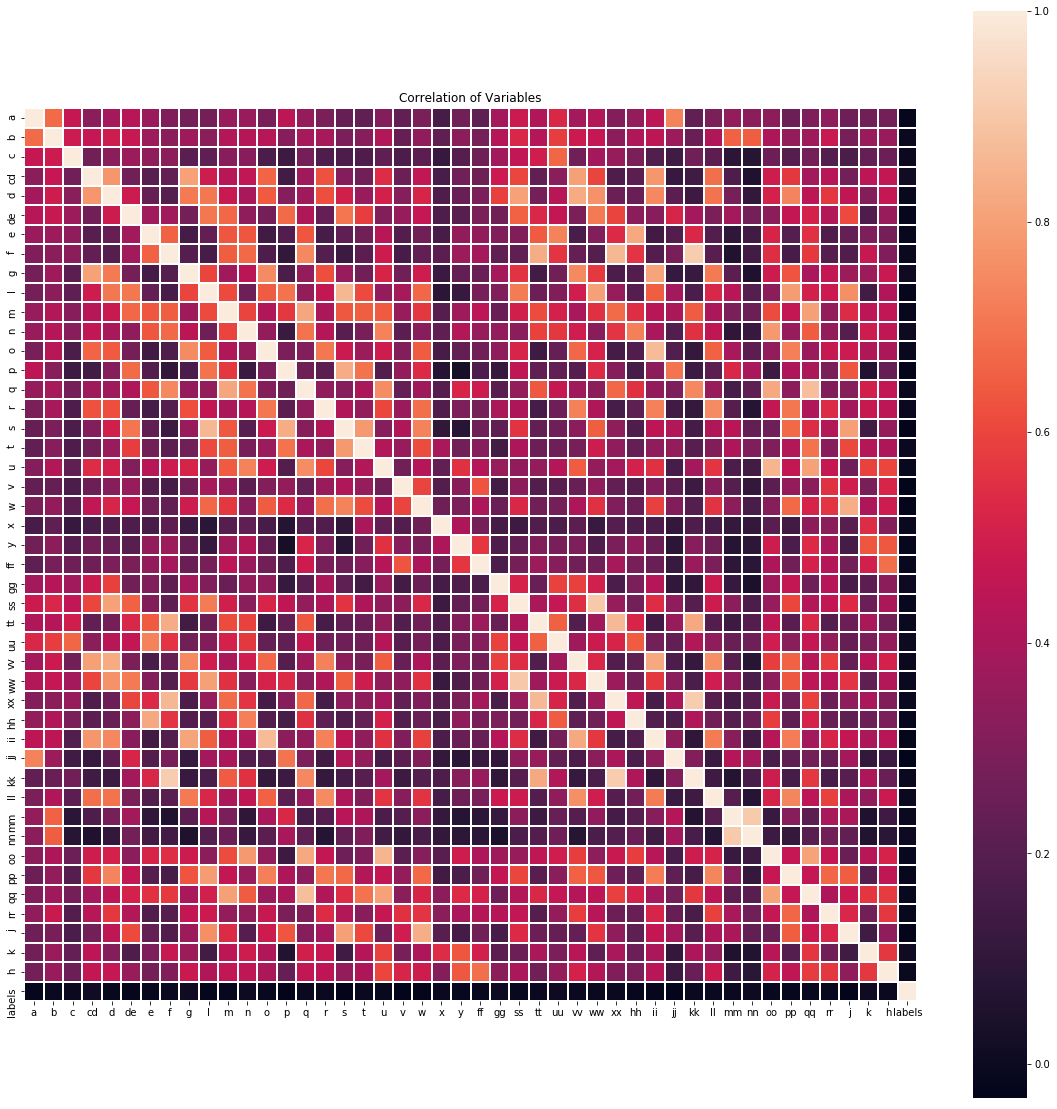

In [8]:
col_list = df.columns
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(df[col_list].corr(),square=True,linewidths=1)
plt.title('Correlation of Variables')

**Normalizing**

In [9]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
x =df[df.columns[:46]]
y =df.labels
x_train, x_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state =  90)

 **Select numerical columns which needs to be normalized**

In [10]:
train_norm = x_train[x_train.columns[0:20]]
test_norm = x_test[x_test.columns[0:20]]

**Normalize Training Data**

In [11]:
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)

**Converting numpy array to dataframe**

In [12]:
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
x_train.update(training_norm_col)
print (x_train.head())

             a         b         c        cd         d        de         e  \
1585 -0.354105 -0.305445 -0.117525 -0.154916 -0.205134 -0.224140 -0.142895   
992  -0.204696  0.312349 -0.201139 -0.203993 -0.193627 -0.057237 -0.111692   
8204 -0.297802 -0.352704 -0.283117 -0.171747 -0.257141 -0.345081 -0.138971   
4674 -0.411978 -0.392180 -0.140315 -0.187469 -0.277363 -0.429146 -0.115687   
3593 -0.325274 -0.320462 -0.211205 -0.123498 -0.112134 -0.417585 -0.146237   

             f         g         l         m         n         o         p  \
1585 -0.102313 -0.177749 -0.185767 -0.144752 -0.231347 -0.122733 -0.262058   
992  -0.090339 -0.195376  0.052427 -0.090994 -0.227187 -0.049325  0.017960   
8204 -0.093026 -0.198088 -0.181708 -0.135793 -0.231869 -0.145518 -0.253797   
4674 -0.032838 -0.194257 -0.316308 -0.270317 -0.005849 -0.126730 -0.222534   
3593 -0.051883  0.009977 -0.175506 -0.263338 -0.217409 -0.087220 -0.291879   

             q         r         s         t         u        

**Normalize Testing Data by using mean and SD of training set**

In [13]:
x_test_norm = std_scale.transform(test_norm)
testing_norm_col = pd.DataFrame(x_test_norm, index=test_norm.index, columns=test_norm.columns) 
x_test.update(testing_norm_col)
print (x_train.head())

             a         b         c        cd         d        de         e  \
1585 -0.354105 -0.305445 -0.117525 -0.154916 -0.205134 -0.224140 -0.142895   
992  -0.204696  0.312349 -0.201139 -0.203993 -0.193627 -0.057237 -0.111692   
8204 -0.297802 -0.352704 -0.283117 -0.171747 -0.257141 -0.345081 -0.138971   
4674 -0.411978 -0.392180 -0.140315 -0.187469 -0.277363 -0.429146 -0.115687   
3593 -0.325274 -0.320462 -0.211205 -0.123498 -0.112134 -0.417585 -0.146237   

             f         g         l         m         n         o         p  \
1585 -0.102313 -0.177749 -0.185767 -0.144752 -0.231347 -0.122733 -0.262058   
992  -0.090339 -0.195376  0.052427 -0.090994 -0.227187 -0.049325  0.017960   
8204 -0.093026 -0.198088 -0.181708 -0.135793 -0.231869 -0.145518 -0.253797   
4674 -0.032838 -0.194257 -0.316308 -0.270317 -0.005849 -0.126730 -0.222534   
3593 -0.051883  0.009977 -0.175506 -0.263338 -0.217409 -0.087220 -0.291879   

             q         r         s         t         u        

**Support vector machine**

In [14]:
import numpy
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [15]:
def svm_classifier(): 
    file_x = '45 channel 1sec gamamapower.csv'
    file_y = 'Label.csv'
    
    X = data
    y = target
    # Split the data into training/testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
   
    	

     # Feature Scaling
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)    
    X_test = sc.transform(X_test)

    # SVM Classifier
    clf = SVC(kernel = 'rbf', random_state = 50)
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_predict)
    print(cm)
    print("Accuracy score : ")
    print(accuracy_score(y_test, y_predict)*100)
    
if __name__ == '__main__':
    svm_classifier()

[[2878   41]
 [2075   41]]
Accuracy score : 
57.974180734856006


**sequential model**

In [16]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
   



model = Sequential()
model.add(Dense(64, input_dim=46, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          epochs=25,
          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Using TensorFlow backend.


Epoch 1/25
5873/5873 [==============================] - 2s 404us/step - loss: 0.7582 - acc: 0.6094
Epoch 2/25
5873/5873 [==============================] - 0s 27us/step - loss: 0.6774 - acc: 0.6756
Epoch 3/25
5873/5873 [==============================] - 0s 27us/step - loss: 0.6289 - acc: 0.7470
Epoch 4/25
5873/5873 [==============================] - 0s 27us/step - loss: 0.5578 - acc: 0.8105
Epoch 5/25
5873/5873 [==============================] - 0s 26us/step - loss: 0.4604 - acc: 0.8541
Epoch 6/25
5873/5873 [==============================] - 0s 27us/step - loss: 0.3850 - acc: 0.8917
Epoch 7/25
5873/5873 [==============================] - 0s 26us/step - loss: 0.3160 - acc: 0.9079
Epoch 8/25
5873/5873 [==============================] - 0s 27us/step - loss: 0.2812 - acc: 0.9171
Epoch 9/25
5873/5873 [==============================] - 0s 26us/step - loss: 0.2267 - acc: 0.9338
Epoch 10/25
5873/5873 [==============================] - 0s 26us/step - loss: 0.1987 - acc: 0.9460
Epoch 11/25
5873/5

**LSTM MODELLING**

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import LSTM

max_features = 1024

model = Sequential()
model.add(Embedding(max_features, output_dim=256))
model.add(LSTM(128))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=20, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=20)

Epoch 1/10
5873/5873 [==============================] - 19s 3ms/step - loss: 0.0462 - acc: 0.9865
Epoch 2/10
5873/5873 [==============================] - 19s 3ms/step - loss: 2.4242e-07 - acc: 1.0000
Epoch 3/10
5873/5873 [==============================] - 18s 3ms/step - loss: 1.1878e-07 - acc: 1.0000
Epoch 4/10
5873/5873 [==============================] - 18s 3ms/step - loss: 1.1208e-07 - acc: 1.0000
Epoch 5/10
5873/5873 [==============================] - 18s 3ms/step - loss: 1.1331e-07 - acc: 1.0000
Epoch 6/10
5873/5873 [==============================] - 18s 3ms/step - loss: 1.0964e-07 - acc: 1.0000
Epoch 7/10
5873/5873 [==============================] - 18s 3ms/step - loss: 1.0899e-07 - acc: 1.0000
Epoch 8/10
5873/5873 [==============================] - 18s 3ms/step - loss: 1.1070e-07 - acc: 1.0000
Epoch 9/10
5873/5873 [==============================] - 18s 3ms/step - loss: 1.0924e-07 - acc: 1.0000
Epoch 10/10
2518/2518 [==============================] - 2s 673us/step
